**CREDIT CARD CUSTOMER CHURN PREDICTION USING ARTIFICIAL NEURAL NETWORKS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [ ]:
df_geography = df['Geography'].value_counts()
df_geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<ipython-input-90-edb0e4cd15cc>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


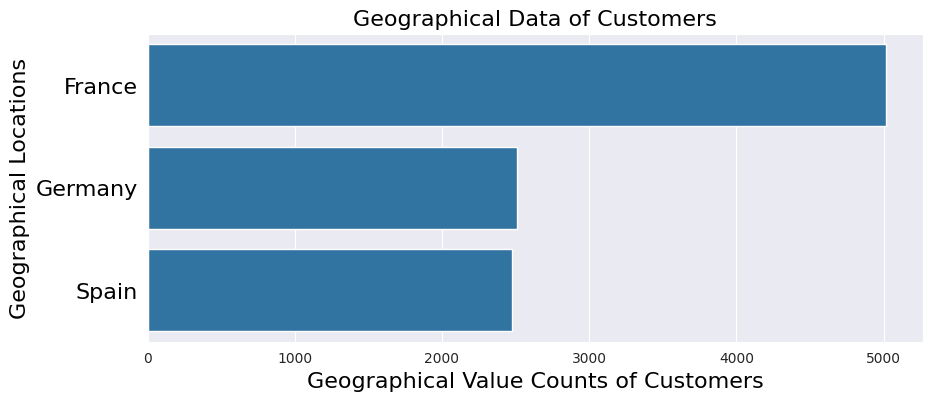

In [ ]:
plt.figure(figsize=(10, 4))
res=sns.barplot(x=df_geography, y=df_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Geographical Value Counts of Customers',fontsize = 16, color='black')
plt.ylabel('Geographical Locations',fontsize = 16, color='black')
plt.title('Geographical Data of Customers',fontsize = 16, color='black')
plt.show()

In [ ]:
df_gender = df['Gender'].value_counts()
df_gender

Male      5457
Female    4543
Name: Gender, dtype: int64

<ipython-input-92-706eed9e85bb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


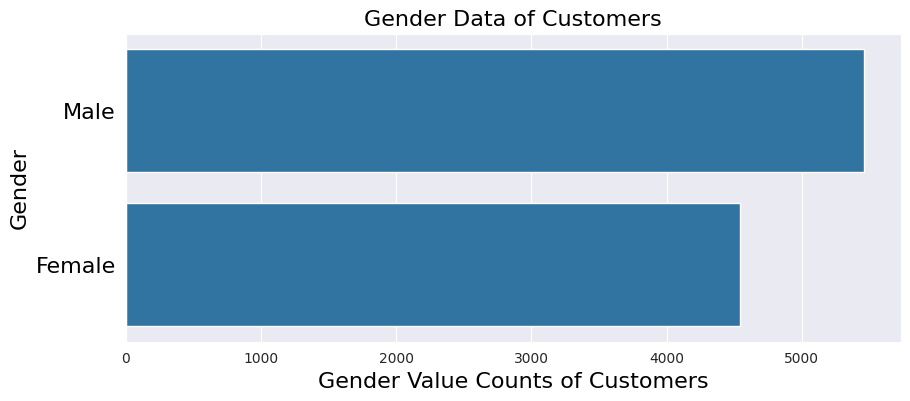

In [ ]:
plt.figure(figsize=(10,4))
res=sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Gender Value Counts of Customers',fontsize = 16, color='black')
plt.ylabel('Gender',fontsize = 16, color='black')
plt.title('Gender Data of Customers',fontsize = 16, color='black')
plt.show()

In [ ]:
df_nop = df['NumOfProducts'].value_counts()
df_nop

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<ipython-input-94-e60cc747366d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


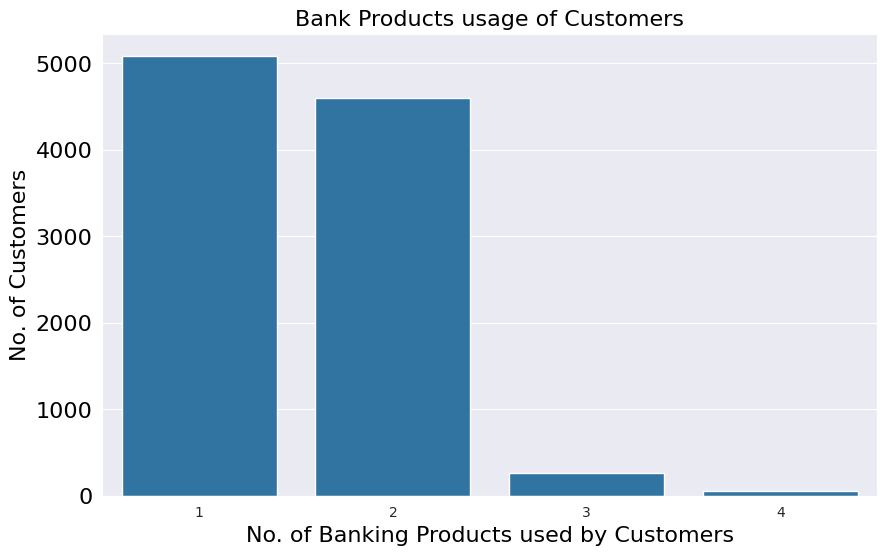

In [ ]:
plt.figure(figsize=(10,6))
res=sns.barplot(y=df_nop, x=df_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('No. of Customers',fontsize = 16, color='black')
plt.xlabel('No. of Banking Products used by Customers',fontsize = 16, color='black')
plt.title('Bank Products usage of Customers',fontsize = 16, color='black')
plt.show()

In [ ]:
df_crc = df['HasCrCard'].value_counts()
df_crc

1    7055
0    2945
Name: HasCrCard, dtype: int64

<ipython-input-96-91024a04ad5e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


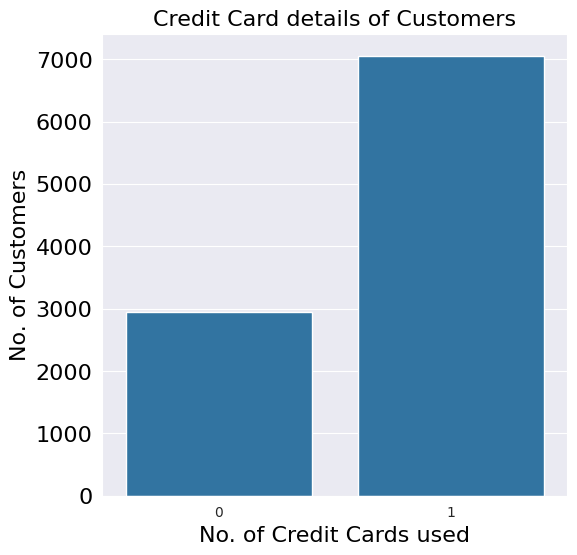

In [ ]:
plt.figure(figsize=(6,6))
res=sns.barplot(y=df_crc, x=df_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('No. of Customers',fontsize = 16, color='black')
plt.xlabel('No. of Credit Cards used',fontsize = 16, color='black')
plt.title('Credit Card details of Customers',fontsize = 16, color='black')
plt.show()

In [ ]:
df_iam = df['IsActiveMember'].value_counts()
df_iam

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<ipython-input-98-0dbce9ac1800>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


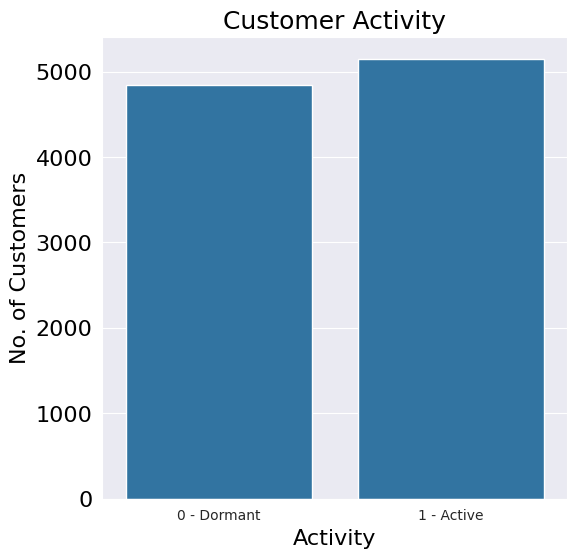

In [ ]:
plt.figure(figsize=(6,6))
res=sns.barplot(y=df_iam, x=df_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
x_values=[0,1]
plt.xticks(x_values, ['0 - Dormant', '1 - Active'])
plt.ylabel('No. of Customers',fontsize = 16, color='black')
plt.xlabel('Activity',fontsize = 16, color='black')
plt.title('Customer Activity',fontsize = 18, color='black')
plt.show()

In [ ]:
df_exit = df['Exited'].value_counts()
df_exit

0    7963
1    2037
Name: Exited, dtype: int64

<ipython-input-100-622611a9e979>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


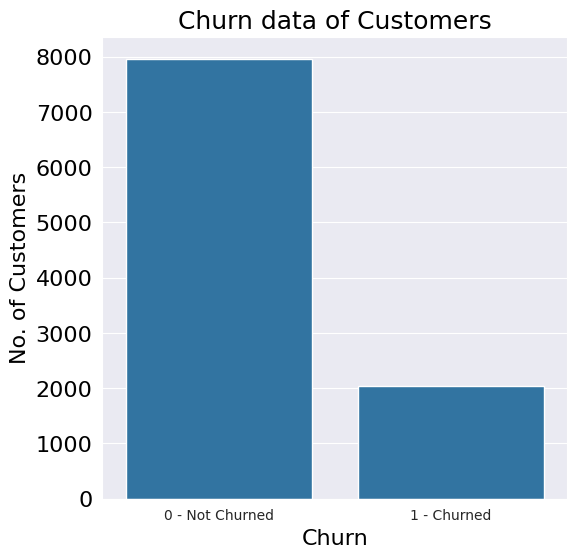

In [ ]:
plt.figure(figsize=(6,6))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
x_values=[0,1]
plt.xticks(x_values, ['0 - Not Churned', '1 - Churned'])
plt.ylabel('No. of Customers',fontsize = 16, color='black')
plt.xlabel('Churn',fontsize = 16, color='black')
plt.title('Churn data of Customers',fontsize = 18, color='black')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]
upsampled_minority = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)
balanced_data = pd.concat([majority_class, upsampled_minority])

In [ ]:
balanced_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,49,4,128504.76,1,1,0,126812.63,1,0,1,0
9337,466,47,5,102085.72,1,1,1,183536.24,1,0,1,0
4345,720,46,3,97042.60,1,1,1,133516.51,1,1,1,0
1085,803,42,5,0.00,1,1,0,196466.83,1,1,0,0


In [ ]:
df_exit = balanced_data['Exited'].value_counts()
df_exit

0    7963
1    7963
Name: Exited, dtype: int64

<ipython-input-106-f7873a93360d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


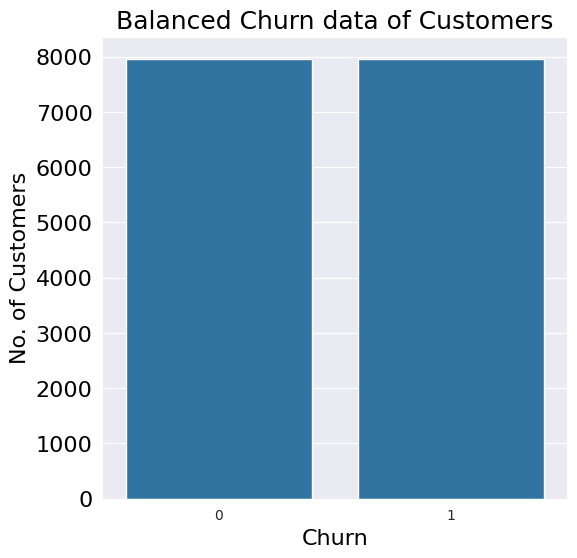

In [ ]:
plt.figure(figsize=(6,6))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('No. of Customers',fontsize = 16, color='black')
plt.xlabel('Churn',fontsize = 16, color='black')
plt.title('Balanced Churn data of Customers',fontsize = 18, color='black')
plt.show()

In [ ]:
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (11148, 11)
X_test Shape :  (4778, 11)
y_train Shape :  (11148,)
y_test Shape :  (4778,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.62190316e-01, -1.11034676e-01,  3.41349559e-01, ...,
         9.69952473e-01, -6.66645072e-01, -5.45422803e-01],
       [ 5.12990748e-01,  1.72889454e-01,  1.02300919e+00, ...,
         9.69952473e-01,  1.50004859e+00, -5.45422803e-01],
       [-5.70363526e-01,  2.72820662e+00,  5.19744067e-04, ...,
        -1.03097835e+00,  1.50004859e+00, -5.45422803e-01],
       ...,
       [ 3.16955213e-01, -8.68165687e-01,  5.19744067e-04, ...,
        -1.03097835e+00, -6.66645072e-01, -5.45422803e-01],
       [ 4.61402449e-01, -4.89600181e-01, -3.40310071e-01, ...,
        -1.03097835e+00, -6.66645072e-01, -5.45422803e-01],
       [-2.71151393e-01, -1.11034676e-01,  1.70466882e+00, ...,
         9.69952473e-01, -6.66645072e-01, -5.45422803e-01]])

In [ ]:
X_test_scaled

array([[ 0.46140245,  0.45681358, -1.0219697 , ...,  0.96995247,
        -0.66664507,  1.83344003],
       [-1.35450567, -0.3949588 ,  1.02300919, ..., -1.03097835,
        -0.66664507, -0.5454228 ],
       [-1.19974077, -0.3949588 , -1.36279952, ...,  0.96995247,
        -0.66664507,  1.83344003],
       ...,
       [ 0.81220288, -0.96280706,  1.36383901, ...,  0.96995247,
        -0.66664507, -0.5454228 ],
       [-0.90052864,  0.74073771, -0.34031007, ...,  0.96995247,
        -0.66664507, -0.5454228 ],
       [ 0.44076713, -0.96280706, -1.0219697 , ...,  0.96995247,
         1.50004859, -0.5454228 ]])

In [ ]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.3)

Epoch 1/100
244/244 [==============================] - 1s 3ms/step - loss: 0.6348 - accuracy: 0.6392 - val_loss: 0.5891 - val_accuracy: 0.7058
Epoch 2/100
244/244 [==============================] - 1s 2ms/step - loss: 0.5705 - accuracy: 0.7096 - val_loss: 0.5494 - val_accuracy: 0.7297
Epoch 3/100
244/244 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7307 - val_loss: 0.5253 - val_accuracy: 0.7384
Epoch 4/100
244/244 [==============================] - 1s 3ms/step - loss: 0.5218 - accuracy: 0.7477 - val_loss: 0.5085 - val_accuracy: 0.7525
Epoch 5/100
244/244 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0.7532 - val_loss: 0.4975 - val_accuracy: 0.7507
Epoch 6/100
244/244 [==============================] - 1s 4ms/step - loss: 0.4973 - accuracy: 0.7575 - val_loss: 0.4904 - val_accuracy: 0.7570
Epoch 7/100
244/244 [==============================] - 1s 2ms/step - loss: 0.4901 - accuracy: 0.7598 - val_loss: 0.4858 - val_accuracy: 0.7593

Text(0.5, 1.0, 'Loss plot of ANN model')

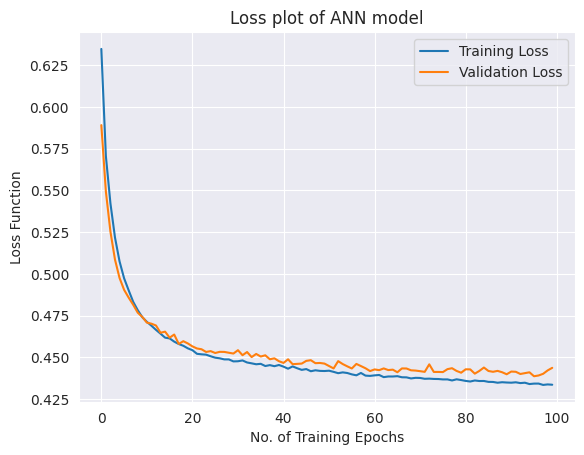

In [143]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("No. of Training Epochs")
plt.ylabel("Loss Function")
plt.legend()
plt.title("Loss plot of ANN model")

Text(0.5, 1.0, 'Accuracy plot of ANN model')

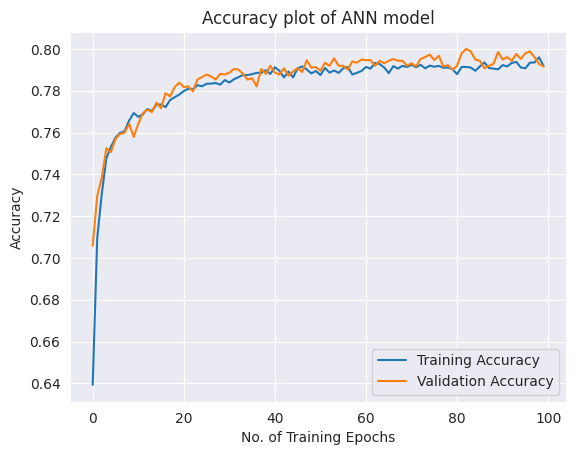

In [144]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("No. of Training Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy plot of ANN model")

In [ ]:
y_log = model.predict(X_test_scaled)

150/150 [==============================] - 0s 1ms/step


In [ ]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [ ]:
accuracy_score(y_test, y_pred)

0.7865215571368773

In [ ]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#taking a new dataset to test the ANN model and preprocessing it
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
data = pd.read_csv('/content/Test_Dataset.csv')
X = data.drop(columns=['Exited'])
y = data['Exited']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed_df = pd.DataFrame(X_preprocessed)
preprocessed_data = pd.concat([X_preprocessed_df, y], axis=1)
preprocessed_data.to_csv('FinalTest.csv', index=False)

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import load_model
#testing the model on unseen data
test_data = pd.read_csv('/content/FinalTest.csv')

In [138]:
X_test = test_data.drop(columns=['Exited'])
y_test = test_data['Exited']
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [139]:
m = load_model('/content/trained_model.h5')

In [140]:
y_pred_proba = m.predict(X_test_scaled)
#testing the model on unseen data
y_pred = (y_pred_proba > 0.5).astype(int)

1/1 [==============================] - 0s 57ms/step
